In [ ]:
!git clone https://github.com/evgmaslov/experiments

In [1]:
from pathlib import Path
import sys
repo = Path("/content/experiments").resolve()
sys.path.append("/content/experiments/")

In [ ]:
!cd {repo} && pip install -r requirements.txt

In [2]:
import methods
from methods import MLMethod, MLMethodConfig
from tasks.base import MLTask, MLTaskConfig
from nn.data.base import DataConfig
from nn.data.collators import TesrCollatorWithConditionConfig
from nn.model.volume_generation.configs import DiffusionConfig, SeisFusionConfig
from nn.train import TrainerConfig
from nn.math.diffusion.schedulers import SeisFusionSchedulerConfig
from utils import dict_to_dataclass
import json

In [3]:
data_config_path = "/content/experiments/configs/seis_fusion/data_config.json"
model_config_path = "/content/experiments/configs/seis_fusion/model_config_diffusers.json"
train_config_path = "/content/experiments/configs/seis_fusion/train_config.json"
task_config_path = "/content/experiments/configs/seis_fusion/task_config.json"

In [4]:
with open(data_config_path, "r") as fp:
    data_config = json.load(fp)
with open(model_config_path, "r") as fp:
    model_config = json.load(fp)
with open(train_config_path, "r") as fp:
    train_config = json.load(fp)
with open(task_config_path, "r") as fp:
    task_config = json.load(fp)

In [5]:
data_config = dict_to_dataclass(data_config, DataConfig, {"collator_config":TesrCollatorWithConditionConfig})
model_config = dict_to_dataclass(model_config, SeisFusionConfig, {"scheduler_config":SeisFusionSchedulerConfig})
train_config = dict_to_dataclass(train_config, TrainerConfig)
task_config = dict_to_dataclass(task_config, MLTaskConfig)
method_config = MLMethodConfig(
    task_config=task_config,
    data_config=data_config,
    model_config=model_config,
    train_config=train_config
)

In [6]:
method = MLMethod(method_config)

In [ ]:
method.load_step("train", "evgmaslov/diffusion-3d-material-conditional", "hub")

In [8]:
generation_task = MLTask(task_config)

In [9]:
task_input = generation_task.get_task_input(resize=0.001)

Input:


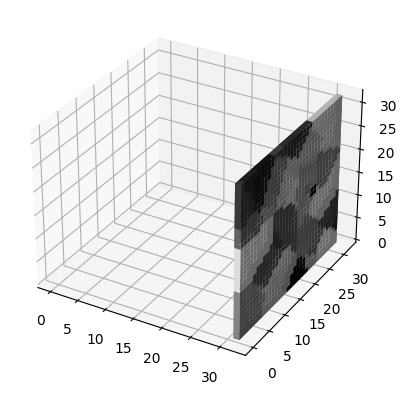

Output:


  0%|          | 0/250 [00:00<?, ?it/s]

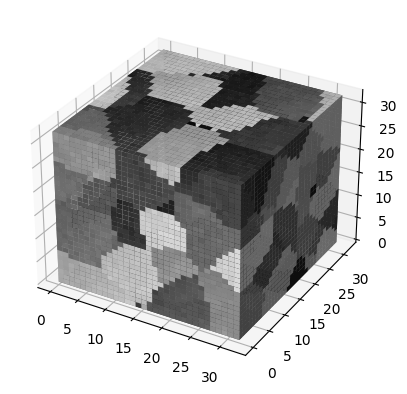

In [10]:
task_output = method.solve(task_input, visualize=True)